In [11]:
from keras.api.models import load_model
from keras.src.utils import image_dataset_from_directory


from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import kagglehub

In [5]:
MODELS_DIR = "./models/"
MODEL_NAME = "new_model.keras"

DATA_DIR = kagglehub.dataset_download("puneet6060/intel-image-classification")
DATASET_DIR_TRAIN = Path(DATA_DIR, "seg_train/seg_train")
DATASET_DIR_TEST = Path(DATA_DIR, "seg_test/seg_test")

In [6]:
BATCH_SIZE = 32

In [7]:
classes = [
    'building',
    'forest',
    'glacer',
    'mountain',
    'sea',
    'street'
]

In [14]:
def test_model(model):
    plt.figure(figsize=(20, 20))
    for test_images, test_labels in test.take(5):
        for i in range(5):
            plt.subplot(1, 5, i + 1)

            idx = np.random.randint(0, test_images.shape[0])
            img = test_images[idx]

            prediction = model.predict(img[None, :])

            real_label = np.argmax(test_labels[idx])
            pred_label = np.argmax(prediction)

            plt.imshow(img.numpy().astype("uint8"))
            plt.title(f'Real: {classes[real_label]}, Prediction:{classes[pred_label]}\n'
                      f'Accurancy:{prediction[0][pred_label]: .3f}', fontsize=10)

            plt.tight_layout()
            plt.axis('off')
        plt.show()
        break

In [9]:
train = image_dataset_from_directory(
  DATASET_DIR_TRAIN,
  image_size=(512, 512),
  batch_size=BATCH_SIZE,
  label_mode="categorical"
)

test = image_dataset_from_directory(
    DATASET_DIR_TEST,
    image_size=(512, 512),
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [12]:
model = load_model(Path(MODELS_DIR, MODEL_NAME))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


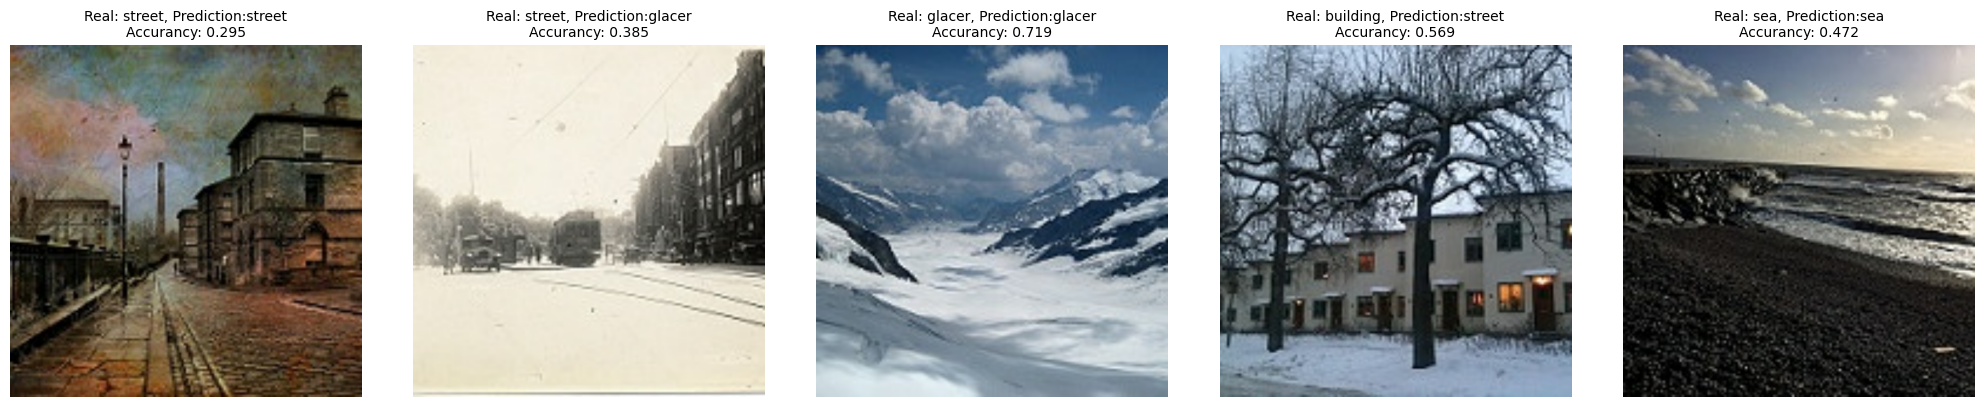

In [16]:
test_model(model)